In [16]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from PIL import Image # 画像表示用
import matplotlib.pyplot as plt # 画像表示用

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/?", one_hot=True)

Extracting MNIST_data/?/train-images-idx3-ubyte.gz
Extracting MNIST_data/?/train-labels-idx1-ubyte.gz
Extracting MNIST_data/?/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/?/t10k-labels-idx1-ubyte.gz


In [39]:
x = tf.placeholder(tf.float32, [None, 784])
labels = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)
top_1 = tf.nn.top_k(y, k=1)
img = tf.reshape(x, [-1, 28, 28])

loss = tf.reduce_mean(-tf.reduce_sum(labels * tf.log(y), reduction_indices=[1]))

opt = tf.train.AdamOptimizer()
opt_op = opt.minimize(loss)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


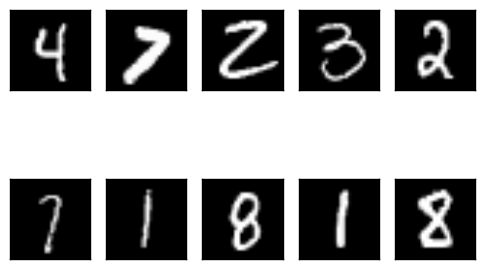

In [41]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(200):
        batch_xs, batch_labels = mnist.train.next_batch(100)
        _loss, _ = sess.run([loss, opt_op], feed_dict={x:batch_xs, labels: batch_labels})
    
    batch_xs, batch_labels = mnist.test.next_batch(10)
    _top_1, _imgs = sess.run([top_1, img], feed_dict={x:batch_xs, labels: batch_labels})
    print(_top_1)
    fig = plt.figure()
    for i in range(10):
        fig.add_subplot(2, 5, i+1)
        plt.tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            left='off',      # ticks along the bottom edge are off
            right='off',         # ticks along the top edge are off
            labelbottom='off', # labels along the bottom edge are off
            labelleft='off') # labels along the bottom edge are off
        plt.imshow(_imgs[i])
        plt.gray()
    
    plt.show()